In [85]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from collections import Counter, defaultdict
import scipy.stats as stats
import tikzplotlib
import matplotlib.pyplot as plt

In [2]:
profession_frequency_df = pd.read_csv("data/analysis_data/top500_merged_profession_frequency.csv", index_col=None)

In [3]:
profession_frequency_df

,profession_merge,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,accountant,0.000014,2.912382e-06,0.000008,2.953883e-06,4.203541e-06,2.389870e-06,1.199190e-05,1.118629e-05,5.234458e-06,...,5.670011e-06,5.475462e-06,4.684715e-06,6.246820e-06,5.750266e-06,5.348605e-06,4.947257e-06,4.641961e-06,6.724351e-06,4.120042e-06
1,acrobat,0.000005,4.853971e-07,0.000002,9.846275e-07,1.868240e-06,6.828201e-07,1.410812e-06,6.292289e-06,3.271536e-06,...,8.015198e-07,3.716377e-07,6.417418e-07,4.656015e-07,5.124000e-07,3.650925e-07,6.184072e-07,7.320016e-07,4.854478e-07,7.704143e-07
2,actor,0.000030,2.329906e-05,0.000041,3.544659e-05,3.269421e-05,1.707050e-05,2.116218e-05,3.950159e-05,2.878952e-05,...,2.977498e-05,3.017698e-05,2.708150e-05,2.692729e-05,2.856155e-05,2.893358e-05,2.731905e-05,2.754826e-05,3.315429e-05,2.003077e-05
3,actress,0.000024,1.601810e-05,0.000016,4.676981e-05,1.868240e-05,1.024230e-05,1.551894e-05,1.398287e-05,1.439476e-05,...,1.175562e-05,1.283389e-05,1.050317e-05,1.247424e-05,1.254431e-05,1.186551e-05,1.098582e-05,8.569775e-06,1.181256e-05,8.575046e-06
4,administrator,0.000005,9.707941e-07,0.000006,4.923138e-07,1.401180e-06,2.048460e-06,3.879734e-06,6.991433e-07,1.308614e-06,...,2.048329e-06,2.130723e-06,1.946617e-06,1.998206e-06,2.125511e-06,1.898481e-06,1.818845e-06,1.874638e-06,1.833914e-06,1.574325e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,wedding planner,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.112967e-07,4.290973e-07,1.384340e-06,1.075049e-06,8.322086e-07,9.914453e-07,5.055707e-07,1.507802e-06,1.182972e-06,5.791094e-07
496,wingman,0.000000,4.853971e-07,0.000000,0.000000e+00,9.341202e-07,0.000000e+00,0.000000e+00,3.495716e-07,9.814609e-07,...,1.484296e-06,1.610430e-06,2.074965e-06,2.347407e-06,1.689022e-06,1.460370e-06,2.400875e-06,1.071222e-06,2.175525e-06,6.364292e-07
497,witch doctor,0.000001,1.678866e-06,0.000001,0.000000e+00,0.000000e+00,7.876407e-07,8.141198e-07,4.036987e-06,1.134625e-06,...,1.268165e-06,5.721297e-07,4.944073e-07,5.151278e-07,5.913061e-07,4.218916e-07,7.372906e-07,3.924415e-07,3.735702e-07,4.246802e-07
498,wrestler,0.000010,1.456191e-06,0.000004,1.476941e-06,2.335301e-06,1.365640e-06,1.058109e-06,0.000000e+00,1.308614e-06,...,2.018643e-06,2.304154e-06,2.802273e-06,2.231007e-06,1.783911e-06,1.314333e-06,1.727902e-06,2.678055e-06,2.966626e-06,1.306355e-06


In [4]:
soc_frequency_df = pd.read_csv("data/analysis_data/soc_frequency.csv", index_col=None)

In [5]:
soc_frequency_df

,soc_code,soc_name,1950,1951,1952,1953,1954,1955,1956,1957,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,11,Management,0.000416,4.412259e-04,5.852006e-04,4.091884e-04,5.436580e-04,0.000548,5.693715e-04,0.000561,...,0.000378,0.000436,0.000433,0.000387,0.000396,4.049724e-04,0.000385,0.000405,4.441448e-04,4.360381e-04
1,13,Business and Financial Operations,0.000054,4.611272e-05,3.741692e-05,5.316989e-05,4.016717e-05,0.000038,6.842440e-05,0.000046,...,0.000044,0.000050,0.000058,0.000052,0.000048,4.765027e-05,0.000048,0.000045,5.095036e-05,4.489468e-05
2,15,Computer and Mathematical,0.000000,9.707941e-07,9.977844e-07,9.846275e-07,1.401180e-06,0.000000,7.054062e-07,0.000001,...,0.000010,0.000004,0.000004,0.000005,0.000007,8.269345e-06,0.000008,0.000012,1.157883e-05,7.938617e-06
3,17,Architecture and Engineering,0.000016,3.203621e-05,2.644129e-05,3.052345e-05,2.241889e-05,0.000035,3.421220e-05,0.000045,...,0.000029,0.000023,0.000025,0.000021,0.000021,1.991580e-05,0.000022,0.000022,2.504551e-05,3.235740e-05
4,19,"Life, Physical, and Social Science",0.000048,3.349240e-05,1.845901e-05,3.495428e-05,3.129303e-05,0.000022,2.927436e-05,0.000036,...,0.000091,0.000086,0.000082,0.000065,0.000061,6.111648e-05,0.000067,0.000056,5.899090e-05,5.543633e-05
5,21,Community and Social Service,0.000173,2.246988e-04,1.471732e-04,1.768536e-04,2.330630e-04,0.000227,1.495461e-04,0.000157,...,0.000148,0.000147,0.000140,0.000131,0.000138,1.393368e-04,0.000148,0.000141,1.431005e-04,1.377357e-04
6,23,Legal,0.000248,2.359537e-04,2.468621e-04,2.555790e-04,2.092153e-04,0.000148,1.487128e-04,0.000221,...,0.000184,0.000192,0.000188,0.000211,0.000216,1.892269e-04,0.000208,0.000198,1.954679e-04,2.045878e-04
7,25,Educational Instruction and Library,0.000143,2.543481e-04,1.147452e-04,1.590173e-04,2.568831e-04,0.000147,1.456664e-04,0.000215,...,0.000141,0.000130,0.000143,0.000136,0.000150,1.361065e-04,0.000132,0.000118,1.183054e-04,1.041734e-04
8,27,"Arts, Design, Entertainment, Sports, and Media",0.000421,4.241228e-04,4.589808e-04,3.722649e-04,4.310640e-04,0.000352,3.941868e-04,0.000372,...,0.000434,0.000453,0.000445,0.000449,0.000456,4.355932e-04,0.000409,0.000410,4.006259e-04,3.509781e-04
9,29,Healthcare Practitioners and Technical Occupat...,0.000812,7.009134e-04,5.822072e-04,6.184217e-04,5.563086e-04,0.000594,4.929980e-04,0.000716,...,0.000449,0.000483,0.000437,0.000417,0.000419,4.397531e-04,0.000435,0.000437,4.251030e-04,4.249076e-04


In [7]:
soc_frequency_df.columns

Index(['soc_code', 'soc_name', '1950', '1951', '1952', '1953', '1954', '1955',
       '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

In [8]:
years = np.arange(1950, 2018)

In [9]:
years.astype(str)

array(['1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957',
       '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'], dtype='<U21')

In [37]:
correlation_col = []
pvalue_col = []

for i, row in soc_frequency_df.iterrows():
    years = np.arange(1950, 2018)
    freqs = row[years.astype(str)]
    correlation, pvalue = stats.spearmanr(freqs, years)
    if pvalue < 0.05:
        space = " " if correlation > 0 else ""
        print(f"{i + 1:2d}. {row.soc_name:50s} {space}{correlation:5.3f} {pvalue:5.3e}")
    correlation_col.append(correlation)
    pvalue_col.append(pvalue)
    
soc_frequency_df["correlation"] = correlation_col
soc_frequency_df["pvalue"] = pvalue_col

inc_soc = soc_frequency_df.loc[(soc_frequency_df["correlation"] > 0) & (soc_frequency_df["pvalue"] < 0.05), "soc_name"].values
dec_soc = soc_frequency_df.loc[(soc_frequency_df["correlation"] < 0) & (soc_frequency_df["pvalue"] < 0.05), "soc_name"].values

print()
print(f"{len(inc_soc)} soc groups' frequency INCREASES vs time")
print(f"{len(dec_soc)} soc groups' frequency DECREASES vs time")
print()

print("significantly INC/DEC soc groups")
for _, row in soc_frequency_df[soc_frequency_df["pvalue"] < 0.05].sort_values(by="correlation").iterrows():
    print(f"{row['soc_name']:50s} {row['correlation']:.3f}")

 1. Management                                         -0.597 7.606e-08
 3. Computer and Mathematical                           0.854 2.242e-20
 4. Architecture and Engineering                       -0.520 5.394e-06
 5. Life, Physical, and Social Science                  0.575 2.977e-07
 6. Community and Social Service                       -0.641 3.974e-09
 8. Educational Instruction and Library                -0.604 5.036e-08
 9. Arts, Design, Entertainment, Sports, and Media      0.280 2.087e-02
10. Healthcare Practitioners and Technical Occupations -0.779 5.368e-15
12. Protective Service                                 -0.779 4.952e-15
14. Building and Grounds Cleaning and Maintenance      -0.909 9.434e-27
15. Personal Care and Service                          -0.308 1.070e-02
16. Sales and Related Occupations                      -0.567 4.761e-07
17. Office and Administrative Support                  -0.893 1.539e-24
18. Farming, Fishing, and Forestry                     -0.475 4.

In [36]:
correlation_col = []
pvalue_col = []

for i, row in profession_frequency_df.iterrows():
    years = np.arange(1950, 2018)
    freqs = row[years.astype(str)]
    correlation, pvalue = stats.spearmanr(freqs, years)
    if pvalue < 0.05:
        print(f"{row.pvalue}")
    correlation_col.append(correlation)
    pvalue_col.append(pvalue)
    
profession_frequency_df["correlation"] = correlation_col
profession_frequency_df["pvalue"] = pvalue_col

inc_prof = profession_frequency_df.loc[(profession_frequency_df["correlation"] > 0) & (profession_frequency_df["pvalue"] < 0.05), "profession_merge"].values
dec_prof = profession_frequency_df.loc[(profession_frequency_df["correlation"] < 0) & (profession_frequency_df["pvalue"] < 0.05), "profession_merge"].values

print()
print(f"{len(inc_prof)} professions' frequency INCREASES vs time")
print(f"{len(dec_prof)} professions' frequency DECREASES vs time")
print()

print("significantly INC/DEC professions")
for _, row in profession_frequency_df[profession_frequency_df["pvalue"] < 0.05].sort_values(by="correlation").iterrows():
    print(f"{row['profession_merge']:50s} {row['correlation']:.3f}")

7.712944751718568e-06
0.033868169137984114
3.3943763899918985e-05
0.00010142700790475745
7.208724286606138e-05
0.0013808820554601093
0.008146110298616501
0.017024912108233727
4.809687977614706e-06
2.053184998677378e-05
0.0031935145510267127
0.04256962726555169
2.921546968232972e-12
0.0005762415629378875
0.002147499879720129
0.010112551786521895
9.37476517316864e-13
0.0035621092651784048
0.009013521550325034
6.556605478959132e-05
4.986350067333548e-07
2.2059077541749099e-16
4.069473849573971e-06
0.0017535681034574885
6.484140670420461e-06
0.0014412911979014504
0.002503039219247552
2.7979793342066907e-08
4.300275702501064e-05
9.4542920979191e-12
0.009483953757317984
0.002298272840392771
0.004799677175139898
0.010190708488542144
0.03170590363565009
8.071272241424956e-05
9.997649585188193e-05
1.0720607667192045e-20
7.333556877189749e-13
9.610605618566116e-05
7.871980028260455e-11
3.721438149955181e-20
0.0025149109189546905
2.4900253492261894e-07
6.245631223950452e-05
1.6046109316557936e-13

In [21]:
profession_frequency_df.index = profession_frequency_df["profession_merge"]

In [25]:
profession_frequency_df.loc["seamstress"]

profession_merge     seamstress
1950                 6.7305e-06
1951                9.70794e-07
1952                1.99557e-06
1953                 3.4462e-06
                       ...     
2015                7.32002e-07
2016                4.31509e-07
2017                5.02444e-07
correlation           -0.304904
pvalue                0.0114648
Name: seamstress, Length: 71, dtype: object

In [27]:
print("x	y	z")

x	y	z


In [28]:
x = "x	y	z"

In [29]:
x

'x\ty\tz'

In [39]:
mentions_df = pd.read_csv("data/mentions/mentions.word_filtered.sense_filtered.soc_mapped.merged.sentiment_added.csv", index_col=None, dtype={"soc_code":str, "soc_name":str})

In [42]:
mentions_df.columns

Index(['profession', 'imdb', 'sent', 'rsi', 'left', 'mention', 'right',
       'start', 'end', 'pos', 'ner', 'sense', 'no_pos_sense', 'is_profession',
       'is_nopos_profession', 'is_person', 'profession_merge', 'soc_code',
       'soc_name', 'sentiment_label', 'sentiment_prob'],
      dtype='object')

In [40]:
mentions_df.shape

(3657827, 21)

In [46]:
mentions_df.profession_merge.unique().size

4073

In [41]:
Counter(mentions_df.sentiment_label)

Counter({0: 3185808, -1: 134775, 1: 337244})

In [43]:
mentions_df["sentence"] = mentions_df.left.fillna("").str.strip() + " <<" + mentions_df.mention.str.strip() + ">> " + mentions_df.right.fillna("").str.strip()

In [45]:
for sent in mentions_df.loc[(mentions_df.sentiment_label == 1), "sentence"].sample(10):
    print(sent)

" Why , when there are so many wonderful new <<playwrights>> ,
- Thinking of being a <<teacher>> ?
So you are the famous dancer and <<film star>> , Kalpana ? "
All your <<teachers>> praise you .
Now if Edward could recover normal affect to the point of being capable ... of general loss , I think I use that as my finest hour as a <<doctor>> .
Your immigration <<counselor>> .
John , he is a highly decorated police <<officer>> .
For all the things he does , is an outstanding game <<show host>> .
Of all the great <<hunters>> and predators that stalk the planet
- There are good <<doctors>> 


In [47]:
mentions_df.imdb.unique().size

133133

## Picture

In [48]:
soc_frequency_df[soc_frequency_df.pvalue < 0.05].sort_values(by="correlation")[["soc_name", "correlation", "pvalue"]]

,soc_name,correlation,pvalue
22,Military Specific Occupations,-0.912700,2.380957e-27
13,Building and Grounds Cleaning and Maintenance,-0.908806,9.433848e-27
16,Office and Administrative Support,-0.892736,1.538738e-24
21,Transportation and Material Moving,-0.831278,1.719858e-18
20,Production,-0.823339,6.858986e-18
11,Protective Service,-0.779364,4.952238e-15
9,Healthcare Practitioners and Technical Occupat...,-0.778753,5.368140e-15
5,Community and Social Service,-0.640760,3.974249e-09
18,Construction and Extraction,-0.638279,4.761971e-09
7,Educational Instruction and Library,-0.603733,5.036325e-08


In [49]:
mentions_df["soc_name"].dropna().unique()

array(['Business and Financial Operations',
       'Arts, Design, Entertainment, Sports, and Media', 'Management',
       'Management;Military Specific Occupations',
       'Sales and Related Occupations', 'Military Specific Occupations',
       'Healthcare Practitioners and Technical Occupations',
       'Life, Physical, and Social Science',
       'Architecture and Engineering', 'Protective Service', 'Production',
       'Legal', 'Transportation and Material Moving',
       'Personal Care and Service',
       'Food Preparation and Serving Related Occupations',
       'Community and Social Service', 'Construction and Extraction',
       'Office and Administrative Support',
       'Farming, Fishing, and Forestry',
       'Sales and Related Occupations;Business and Financial Operations',
       'Production;Construction and Extraction',
       'Building and Grounds Cleaning and Maintenance',
       'Sales and Related Occupations;Office and Administrative Support',
       'Office and Admi

In [50]:
map_df = mentions_df[["profession","no_pos_sense","soc_code","soc_name"]].dropna(subset=["soc_code"]).drop_duplicates()

In [52]:
map_df.soc_code.unique()

array(['13', '27', '11', '11;55', '41', '55', '29', '19', '17', '33',
       '51', '23', '53', '39', '35', '21', '47', '43', '45', '41;13',
       '51;47', '37', '41;43', '43;13', '11;13', '25;27', '25', '11;23',
       '49', '49;47', '37;47', '15', '41;51', '33;55', '31', '13;53',
       '11;21', '53;55', '43;11', '43;23', '11;43'], dtype=object)

In [63]:
years = np.arange(1950, 2018).astype(str)

In [65]:
profession_frequency_df.loc[["masseur", "masseuse"], years].sum()

1950    0.000000e+00
1951    4.853971e-07
1952    0.000000e+00
1953    4.923138e-07
1954    4.670601e-07
            ...     
2013    8.762220e-07
2014    1.018553e-06
2015    1.517564e-06
2016    9.169570e-07
2017    8.039106e-07
Length: 68, dtype: float64

In [59]:
soc_frequency_df.index = soc_frequency_df.soc_code

In [66]:
soc_frequency_df.loc[31, years]

1950              0
1951    4.85397e-07
1952              0
1953    4.92314e-07
1954     4.6706e-07
           ...     
2013    8.76222e-07
2014    1.01855e-06
2015    1.51756e-06
2016    9.16957e-07
2017    8.03911e-07
Name: 31, Length: 68, dtype: object

In [67]:
profession_frequency_df.loc[["masseur", "masseuse"], years].sum() == soc_frequency_df.loc[31, years]

1950     True
1951     True
1952     True
1953     True
1954     True
        ...  
2013     True
2014    False
2015     True
2016    False
2017     True
Length: 68, dtype: bool

In [68]:
employment_df = pd.read_csv("data/employment/emp.csv", index_col=None)

In [69]:
employment_df

,mcode,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,11,8063410,7782680,7212360,7092460,6653480,6200940,5960560,5892900,6003930,...,6116380,6022860,6183820,6390430,6542950,6741640,6936990,7090790,7280330,7616650
1,13,4361980,4619270,4676680,4772120,4924210,5131840,5410410,5826140,6015500,...,6063670,6090910,6178070,6419370,6658090,6828940,7032560,7281190,7472750,7721300
2,15,2620080,2932810,2825870,2772620,2827010,2915300,2952740,3076200,3191360,...,3303690,3283950,3406720,3578220,3696180,3834180,4005250,4165140,4261460,4384300
3,17,2506380,2575620,2489070,2411260,2376650,2372770,2382480,2430250,2486020,...,2412730,2305530,2310830,2356530,2380840,2418020,2475390,2499050,2516780,2556220
4,19,909530,1038670,1067730,1078630,1113130,1131390,1185730,1231070,1255670,...,1308380,1064510,1082370,1104100,1135030,1144440,1146110,1152840,1148300,1171910
5,21,1404540,1469000,1523890,1576980,1615610,1673740,1692950,1749210,1793040,...,1891320,1901180,1890410,1882080,1901730,1930750,1972140,2019250,2096740,2171820
6,23,858320,890910,909370,934850,951510,958520,986740,976740,998590,...,999020,992650,1002330,1023020,1041700,1052900,1062370,1075520,1095770,1127900
7,25,7344830,7450860,7658480,7772470,7831630,7891810,8078500,8206440,8316360,...,8488740,8457870,8409060,8374910,8400640,8435780,8542670,8636430,8727710,8779780
8,27,1551600,1513420,1508790,1503680,1538150,1595710,1683310,1727380,1761270,...,1745670,1716640,1725670,1750130,1758310,1793700,1843600,1902970,1925140,1951170
9,29,6001950,6041210,6118970,6185020,6173760,6359380,6547350,6713780,6877680,...,7200950,7346580,7514980,7649930,7755810,7854380,8021800,8318500,8506740,8646730


In [70]:
employment_df.index = employment_df.mcode

In [74]:
employment_df /= employment_df.sum()

In [72]:
years = np.arange(1999, 2018).astype(str)

In [78]:
for i in range(22):
    code = 11 + 2*i
    media = soc_frequency_df.loc[code, years].values
    employment = employment_df.loc[code, years].values
    correlation, pvalue = stats.spearmanr(media, employment)
    if pvalue < 0.05:
        print(code, correlation, pvalue)

15 0.5877192982456141 0.008139305847095202
21 -0.7736842105263159 0.00010186400382945166
29 -0.6807017543859648 0.0013370693862695168
35 0.6736842105263158 0.001565449761605664
37 0.712280701754386 0.0006226087633379054
43 0.9578947368421052 1.2135311926058017e-10
51 0.5350877192982456 0.01823909654575659
53 0.7210526315789473 0.0004947294682852213


In [79]:
professions_df = pd.read_csv("data/mentions/professions.word_filtered.sense_filtered.merged.csv", index_col=None)

In [80]:
top1000_professions_frequency_df = pd.read_csv("data/analysis_data/top1000_merged_profession_frequency.csv", index_col=None)

In [84]:
correlation_col = []
pvalue_col = []

for i, row in top1000_professions_frequency_df.iterrows():
    years = np.arange(1950, 2018)
    freqs = row[years.astype(str)]
    correlation, pvalue = stats.spearmanr(freqs, years)
    if pvalue < 0.05:
        print(f"{pvalue}")
    correlation_col.append(correlation)
    pvalue_col.append(pvalue)
    
top1000_professions_frequency_df["correlation"] = correlation_col
top1000_professions_frequency_df["pvalue"] = pvalue_col

inc_prof = top1000_professions_frequency_df.loc[(top1000_professions_frequency_df["correlation"] > 0) & (top1000_professions_frequency_df["pvalue"] < 0.05), "profession_merge"].values
dec_prof = top1000_professions_frequency_df.loc[(top1000_professions_frequency_df["correlation"] < 0) & (top1000_professions_frequency_df["pvalue"] < 0.05), "profession_merge"].values

print()
print(f"{len(inc_prof)} professions' frequency INCREASES vs time")
print(f"{len(dec_prof)} professions' frequency DECREASES vs time")
print()

print("significantly INC/DEC professions")
for _, row in top1000_professions_frequency_df[top1000_professions_frequency_df["pvalue"] < 0.05].sort_values(by="correlation").iterrows():
    print(f"{row['profession_merge']:50s} {row['correlation']:.3f}")

4.924060131449037e-06
7.712944751718568e-06
0.033868169137984114
5.882738842458951e-08
8.541416169517148e-07
3.3943763899918985e-05
0.00010142700790475745
7.208724286606138e-05
6.443316225511558e-05
0.03977521943098648
3.938557952419112e-05
0.0013808820554601093
1.2247140312214327e-11
0.008146110298616501
0.017024912108233727
0.008388312205834705
4.809687977614706e-06
0.007113516905058433
0.0028384848925317873
9.454485116817648e-08
2.1192726095711605e-05
2.053184998677378e-05
0.0031935145510267127
2.6730785888674313e-06
0.04256962726555169
0.00035943159212209984
2.921546968232972e-12
8.982885609026354e-06
1.6443028972892145e-05
0.0005762415629378875
0.002147499879720129
0.0168574601904885
0.011968035898662792
9.489677930694944e-06
0.010112551786521895
9.37476517316864e-13
5.085644449858448e-14
0.0005136350879810593
0.0035621092651784048
0.009013521550325034
6.556605478959132e-05
1.7154928352723862e-06
4.986350067333548e-07
2.2059077541749099e-16
1.5710369280114445e-11
2.749776417922230

## Pictures

In [96]:
def plot_trend(items, df, min_year=1950, max_year=2017, xticks=[1950, 1960, 1970, 1980, 1990, 2000, 2010, 2017], smooth=5, xlabel="year", ylabel="frequency"):
    plt.close("all")
    years = np.arange(min_year, max_year + 1).astype(str)
    for item in items:
        plt.plot(df.loc[item, years].rolling(window=smooth, min_periods=1).mean(), label=item, lw=3)
    plt.xticks(np.array(xticks).astype(str))
    if xlabel is not None:
        plt.xlabel(xlabel)
    if ylabel is not None:
        plt.ylabel(ylabel)
    plt.legend(prop={"size":12})
    plt.show()

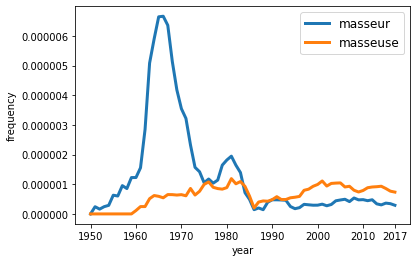

In [101]:
plot_trend(["masseur", "masseuse"], profession_frequency_df)

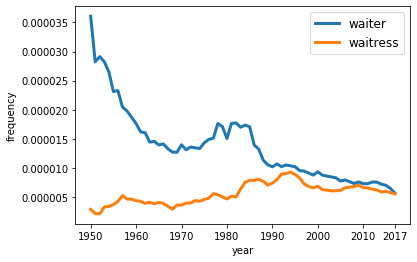

In [98]:
plot_trend(["waiter", "waitress"], profession_frequency_df)

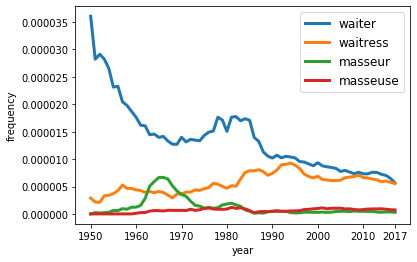

In [102]:
plot_trend(["waiter", "waitress", "masseur", "masseuse"], profession_frequency_df)

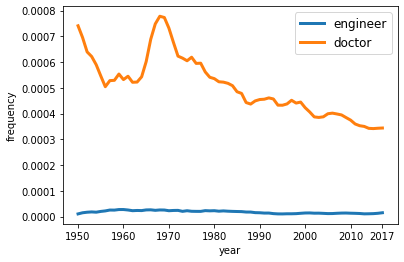

In [105]:
plot_trend(["engineer", "doctor"], profession_frequency_df)

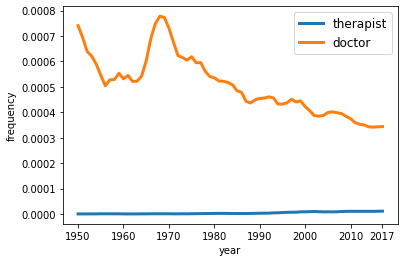

In [108]:
plot_trend(["therapist", "doctor"], profession_frequency_df)

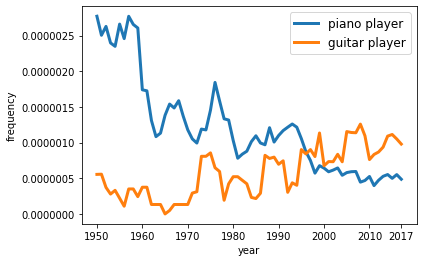

In [110]:
plot_trend(["piano player","guitar player"], profession_frequency_df)

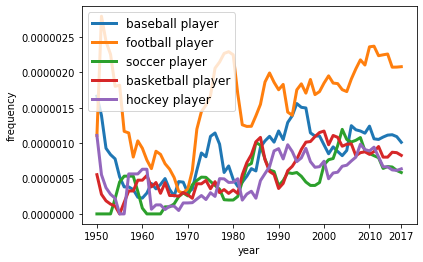

In [111]:
plot_trend(["baseball player", "football player", "soccer player", "basketball player", "hockey player"], profession_frequency_df)

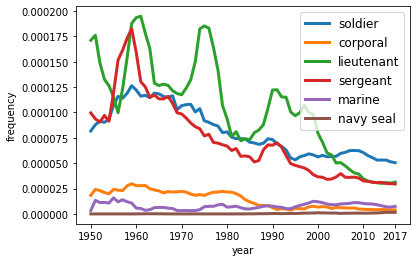

In [113]:
plot_trend(["soldier", "corporal", "lieutenant", "sergeant", "marine", "navy seal"], profession_frequency_df)

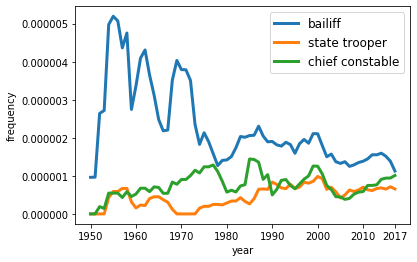

In [115]:
plot_trend(["bailiff", "state trooper", "chief constable"], profession_frequency_df)

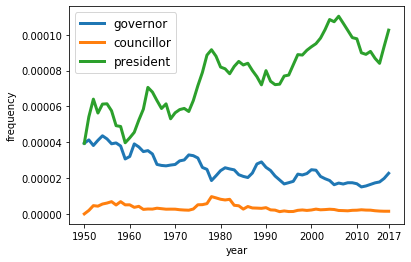

In [117]:
plot_trend(["governor", "councillor", "president"], profession_frequency_df)

In [ ]:
plot_trend([""])